# Uma otimização utilizando o algoritmo de Simulated Annealing (SA)

O algoritmo de simulated annealing (SA) é inspirado em conceitos da termodinâmica, no qual simula o efeito de resfriamento de um conjunto de átomos. Este efeito é chamado recozimento.

Iremos utilizar a função Rastrigin, que foi proposta em 1974. Ela é um exemplo de função não-convexa, que possui diversos mínimos locais e um mínimo global localizado na coordenadas $(x,y) = (0,0)$. A função rastrigin n-dimensional é dada por : 

$$ f(\mathbf{x}) = An + \sum_{i = 1}^{n} [x_{i}^2 - A \cos(2 \pi x_i)] .$$

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definindo as funções

### Função Rastrigin

In [2]:
def rastrigin_function(x,y):
    '''
    Calculate the rastrigin map.   
    
    '''
    p1 = x
    p2 = y
    z = 20. + p1**2 + p2**2 - 10.*np.cos(2.*np.pi*p1) - 10.*np.cos(2.*np.pi*p2)
    return z

In [3]:
def rastrigin(p):
    '''
    Calculate the rastrigin function.   
    
    '''
    p1 = p[0]
    p2 = p[1]
    z = 20. + p1**2 + p2**2 - 10.*np.cos(2.*np.pi*p1) - 10.*np.cos(2.*np.pi*p2)
    return z

## Visualização do mapa

In [4]:
Nx = 50
Ny = 50

In [5]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-5.,5.,num=Ny)
X,Y = np.meshgrid(x,y)

In [6]:
Z = rastrigin_function(X,Y) 

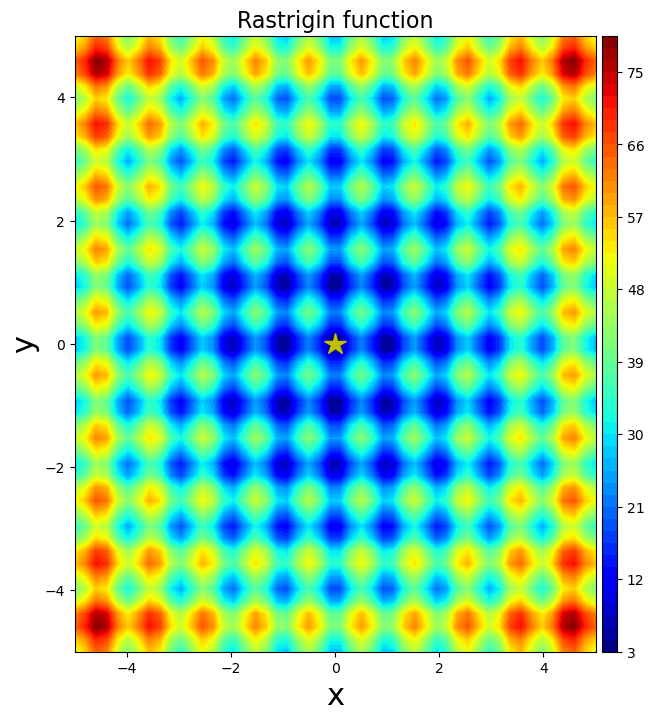

In [7]:
title_font = 22
bottom_font = 16
plt.figure(figsize=(8,8))
plt.title('Rastrigin function', fontsize=bottom_font)
plt.contourf(X, Y, Z, 50,cmap='jet')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.plot(0., 0., '*y',markersize=bottom_font)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.show()

## O algoritmo de Simulated Annealing

In [8]:
itmax = 100
it = 30

# initial approximation and initial temperature
p0 = np.array([4.5,4.5]).reshape(2,)
phi0 = rastrigin(p0)
T = 3000.

# Lists of information about phi and p0

px = [p0[0]]
py = [p0[1]]

# List of phi
phi_it = []


In [9]:
for i in range(itmax):
    phi0 = rastrigin(p0)
    for j in range(it):
        rand = 2.*np.random.random(2) - 1.
        p_new = p0 + rand
        phi_new = rastrigin(p_new)
        dphi = phi_new - phi0
        if dphi <= 0.:
            p = p_new
            phi = phi_new
            break
        elif dphi > 0:
            P = np.exp(-dphi/T)
            r = np.random.random(1)
            if r <= P:
                p = p_new
                phi = phi_new
                
    alpha = 0.2
    T = alpha*T
    p0 = p
    phi0 = phi
    
    phi_it.append(phi)
    px.append(p0[0])
    py.append(p0[1])

## As estimativas obtidas através do algoritmo

In [10]:
print (p0)

[ 0.00716234 -0.01319821]


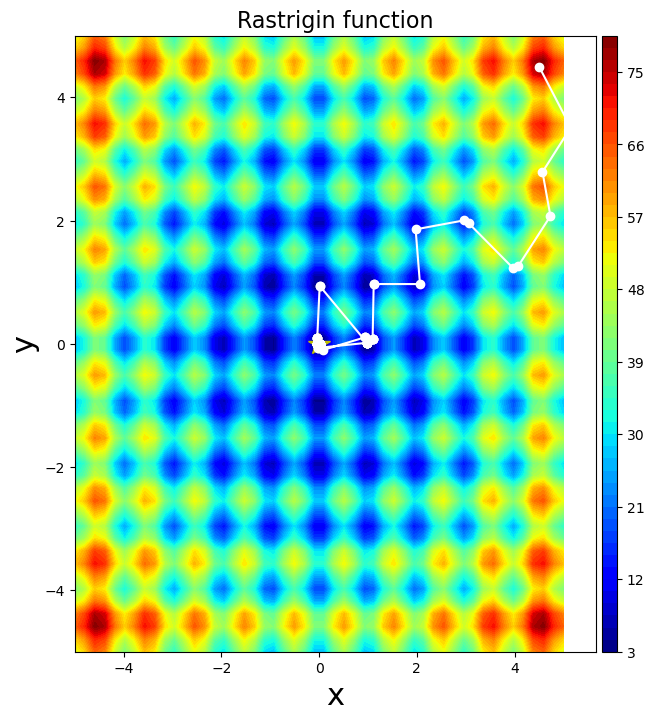

In [11]:
title_font = 22
bottom_font = 16
plt.figure(figsize=(8,8))
plt.title('Rastrigin function', fontsize=bottom_font)
plt.contourf(X, Y, Z, 50,cmap='jet')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.plot(0., 0., '*y',markersize=bottom_font)
plt.plot(px,py,'wo-')
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.show()

## Analysis of convergence

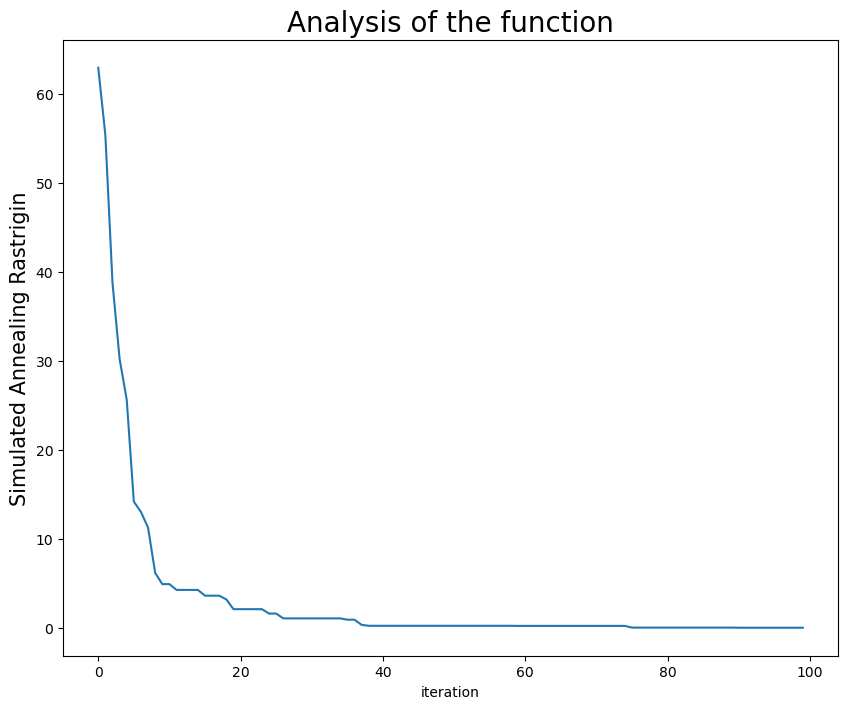

In [12]:
plt.figure(figsize=(10,8))
plt.plot(phi_it, '-')
plt.title('Analysis of the function',fontsize=20)
plt.ylabel('Simulated Annealing Rastrigin',fontsize=15)
plt.xlabel('iteration',)
plt.show()